In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.core.debugger import set_trace
import warnings
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from math import floor
warnings.filterwarnings('ignore')

df = pd.read_csv('mergedDataset.csv')

# Part 2.1 : Visualizing the High Dimensional Data

In [177]:
# Helper function used to see if there are too many NaNs.
# Opted to do this instead of clear the data even further, since it's not entirely necessary,
#  it's just here to clean up the data in the visual representaion
def countNans(dframe):
    countNans = len(dframe) - dframe.count()
    return countNans

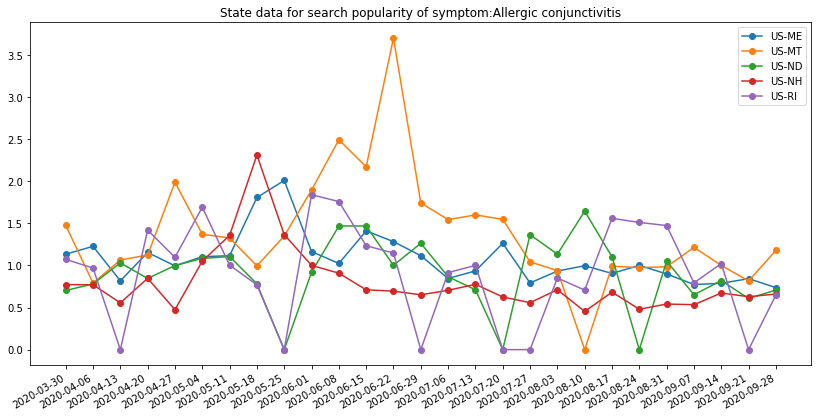

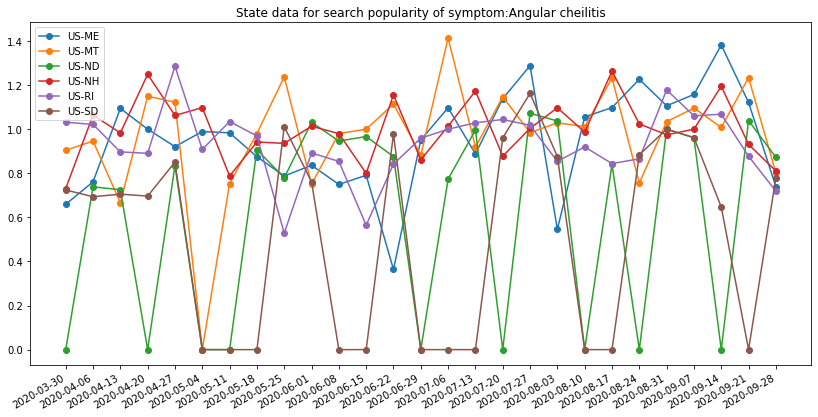

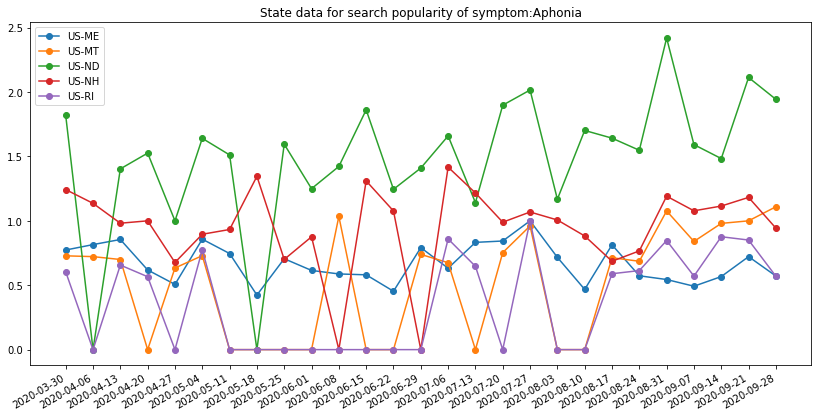

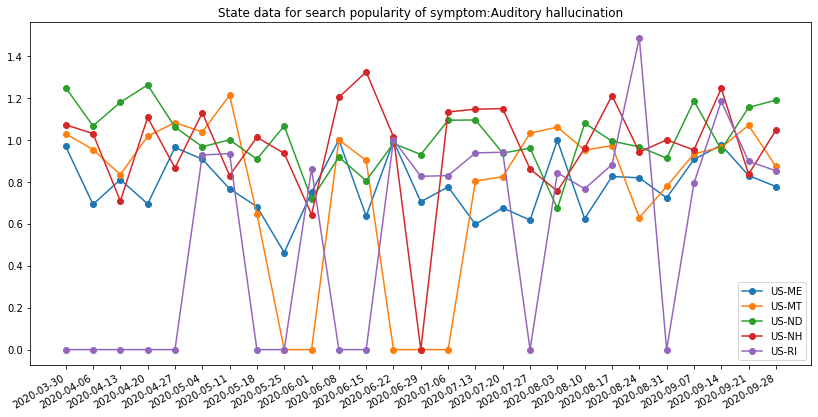

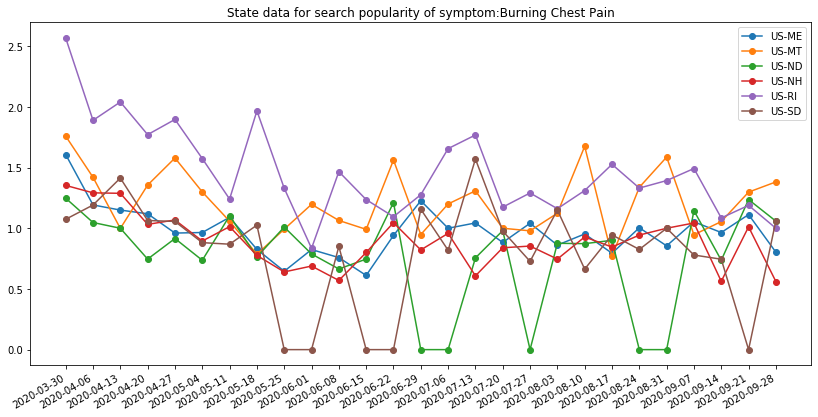

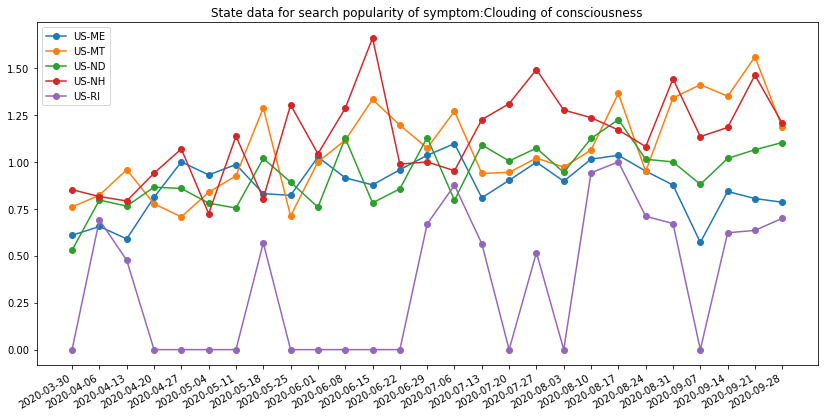

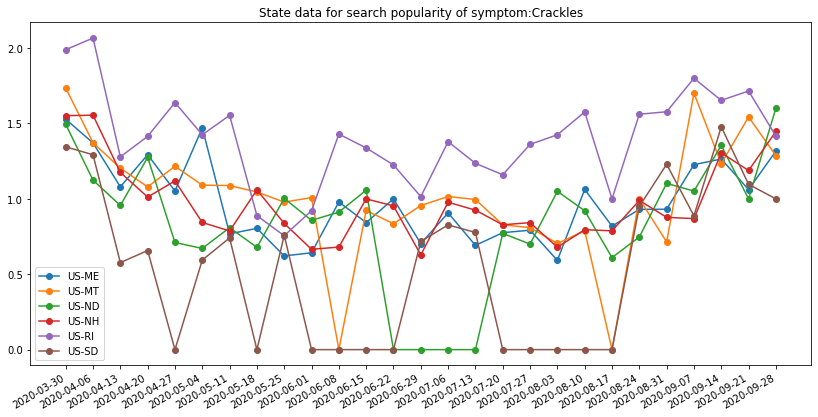

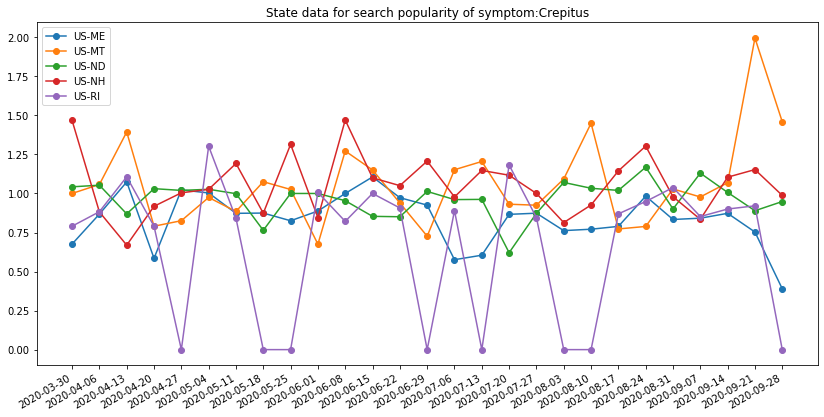

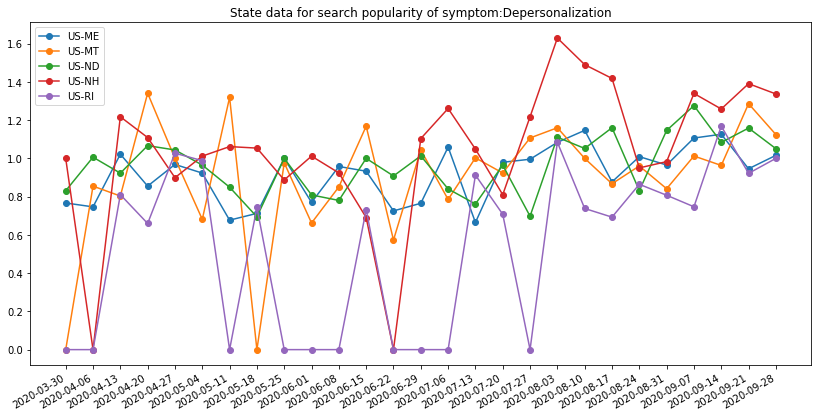

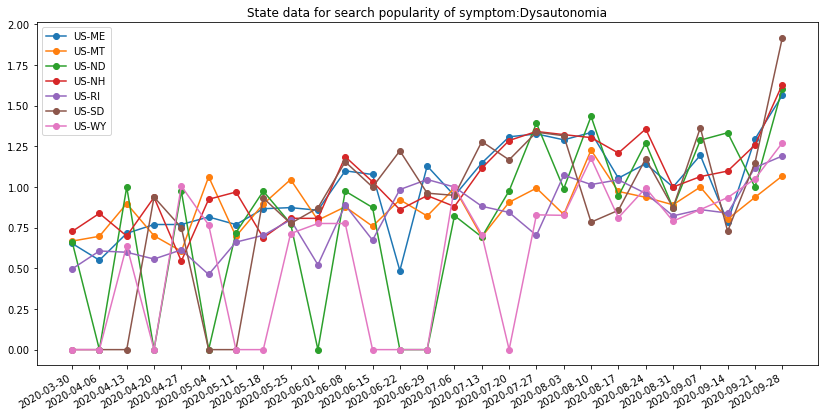

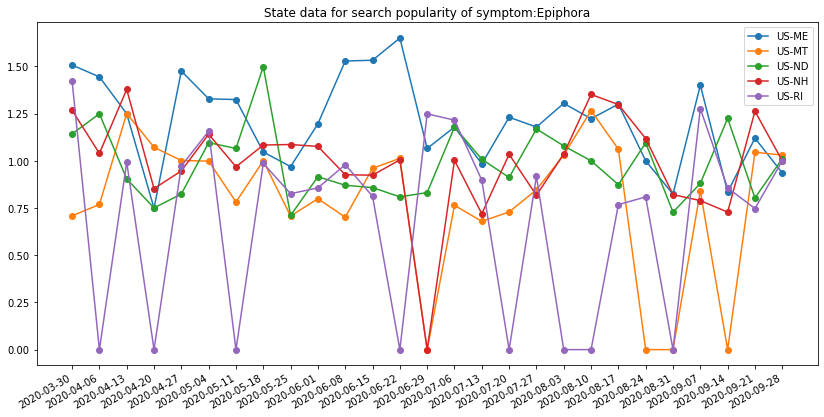

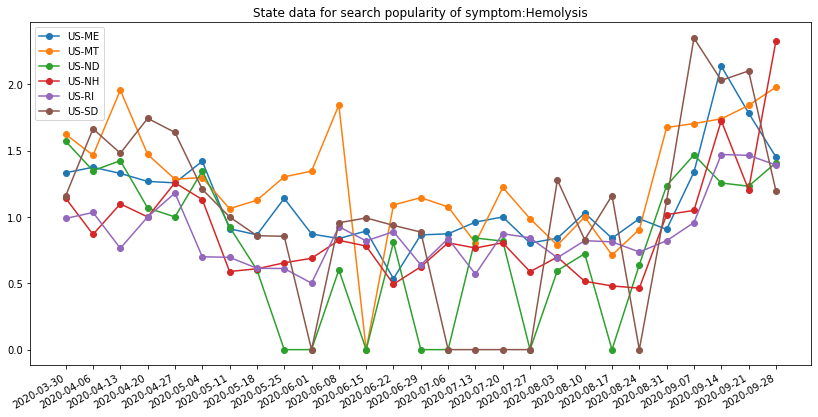

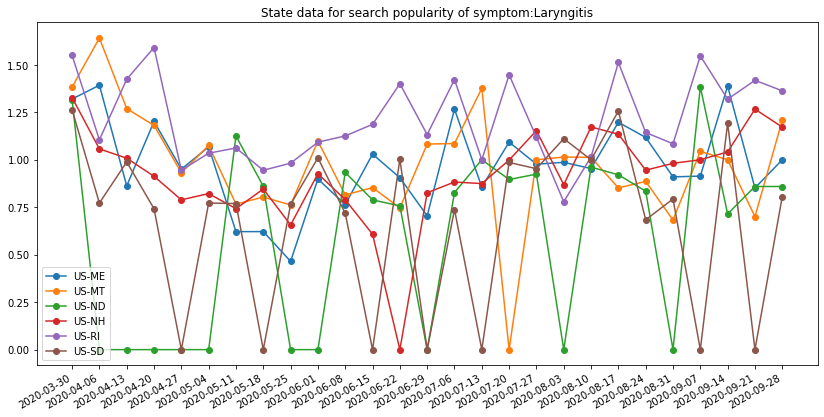

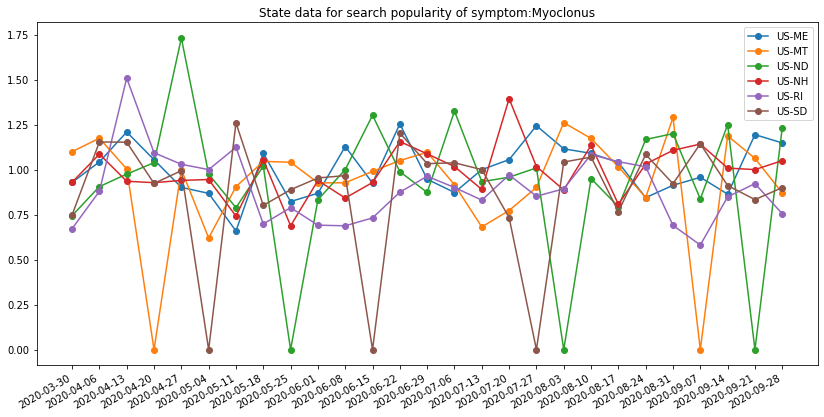

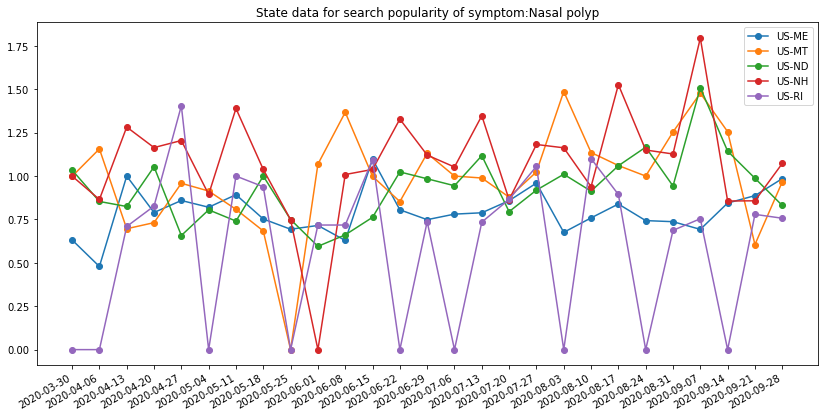

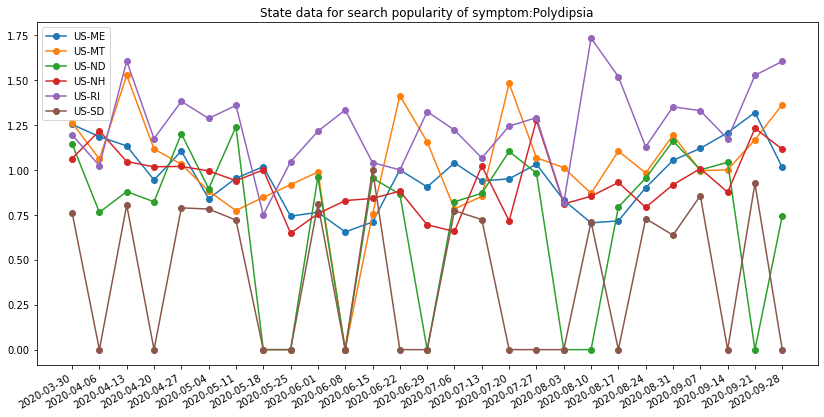

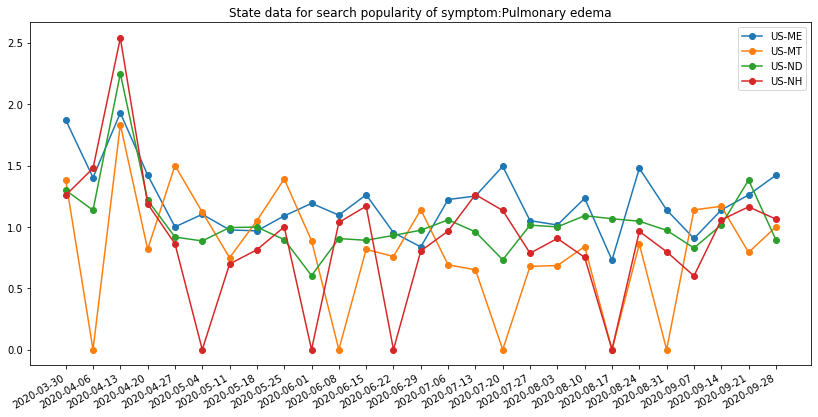

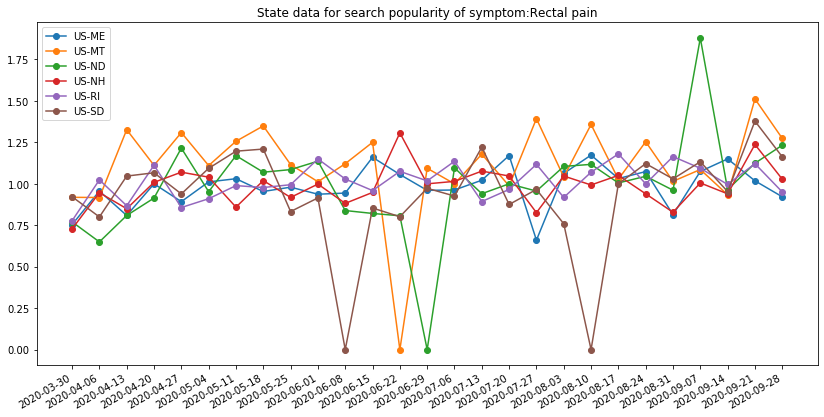

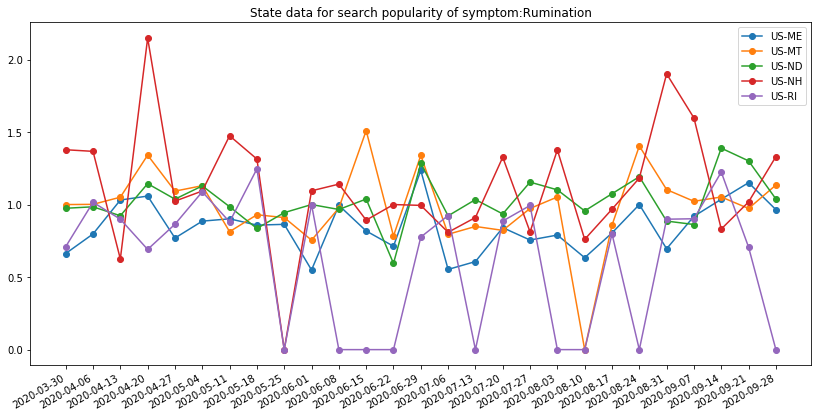

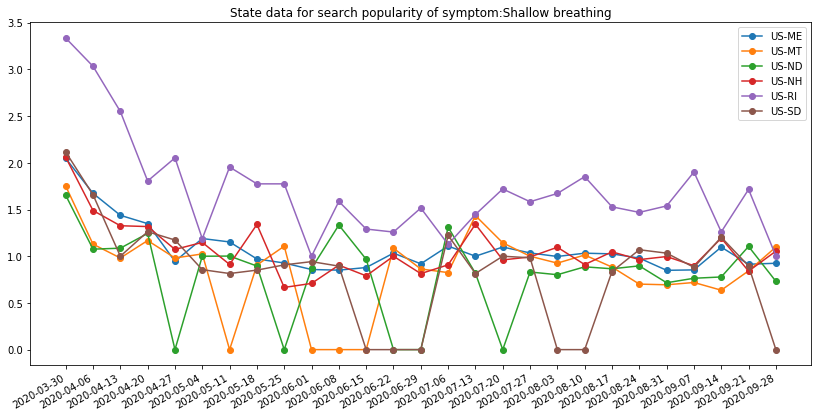

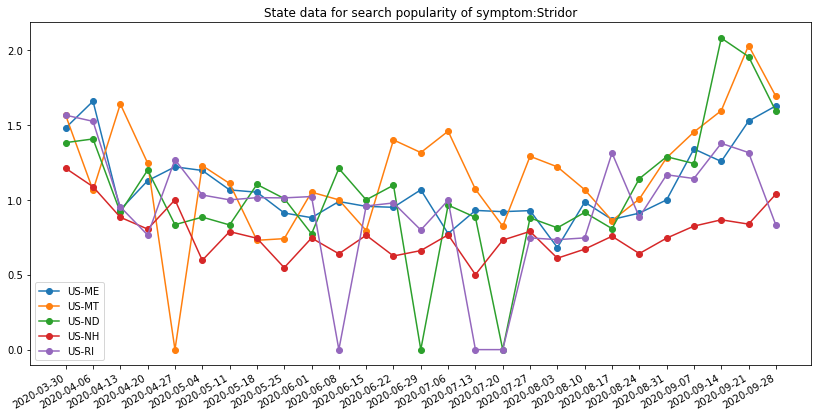

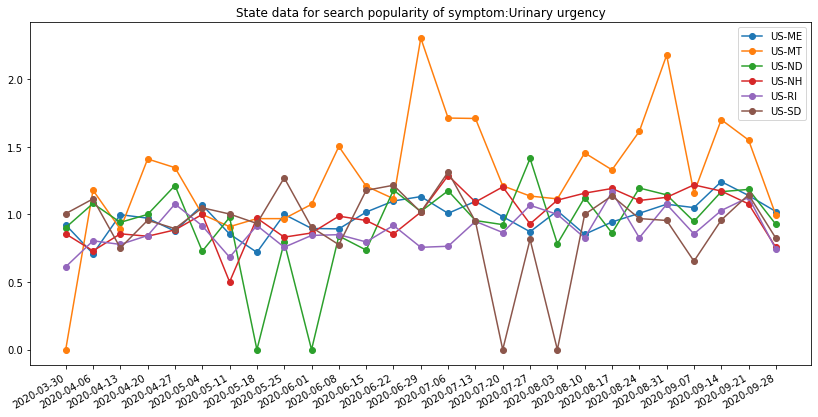

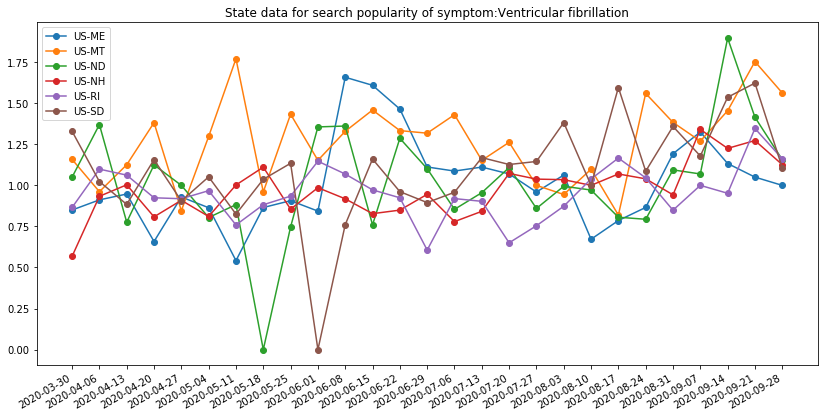

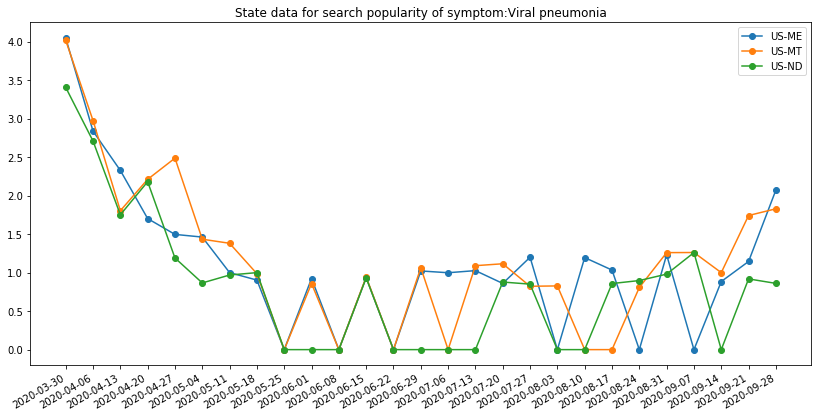

In [178]:
# State trends for each symptoms' search popularity
# Generates a plot of each states' search trends for a given symptom.
# Takes a symptom index (column of the csv which the symptom is located at)
#  to dynamically generate a plot based on the symptom
# NOTE : All NaNs are set to 0
def generateSymptomsPlot(symptomIdx):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(14, 7))
    fig.autofmt_xdate()

    
    stateList = list(df.columns.values)                      # Generate dynamic title based on symptom index parameter
    stateName = stateList[symptomIdx]
    plt.title(f'State data for search popularity of {stateName}')

    stateNames = []                                         # List of state codes dynamically generated for graph legend
    for i in range(0,7):
        start_idx = i*27
        end_idx = start_idx+27
        state_group = df.iloc[ start_idx:end_idx, :-1 ]     # For each state, select (r,r+27) and all columns in csv except last column, which is hospitalizations
        y_axis = state_group.iloc[:,symptomIdx]             # Select a specific symptom for a state
        
        stateName = state_group.iloc[0,0]                   # Get the State code
        stateNames.append(stateName)                        # Append it to the list of state codes

        numberOfNans = countNans(y_axis)                    # Count the number of NaNs
        if numberOfNans > (len(y_axis)/2):
            continue
        else :
            x_axis = state_group.iloc[:,1]                  # Dates for x-axis, select all rows from group state, but 1st column
            y_axis[np.isnan(y_axis)] = 0                    # Set NaNs to 0
            plt.plot_date(x_axis, y_axis, linestyle='solid')
        
    ax.legend(stateNames)                                   # Now generate legend
    plt.show()
    
# Generates a plot for each states' search trends for any given symptom from the cleaned data!
# NOTE : All NaNs are set to 0
lastColumnIdx = len(df.count(axis='rows')) - 1
for sympIdx in range(2,lastColumnIdx):
    generateSymptomsPlot(sympIdx)

# Below is additional data visualization

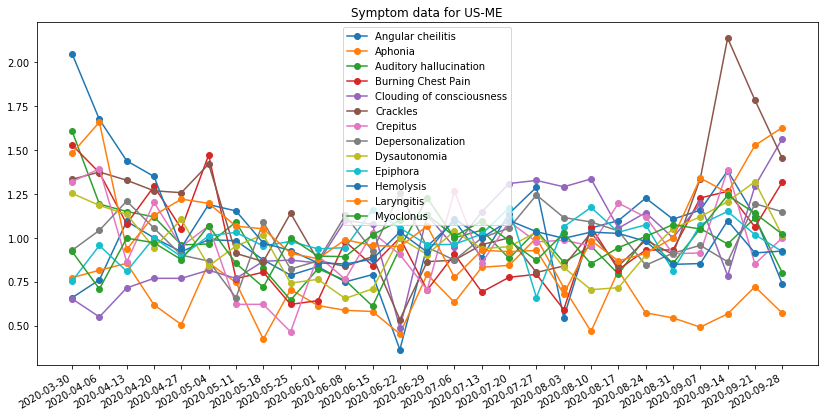

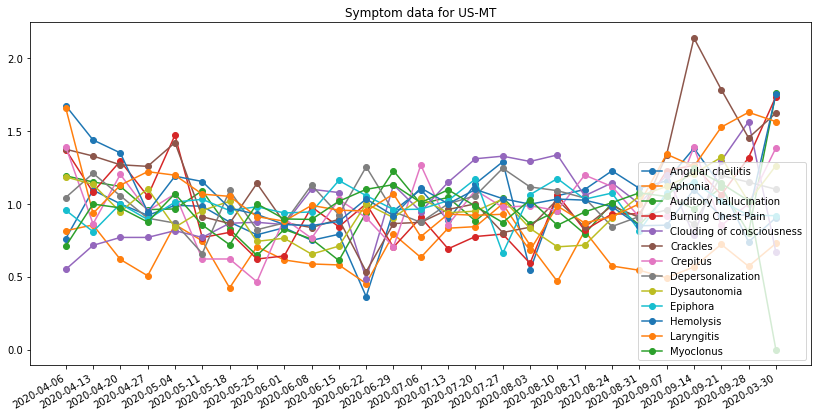

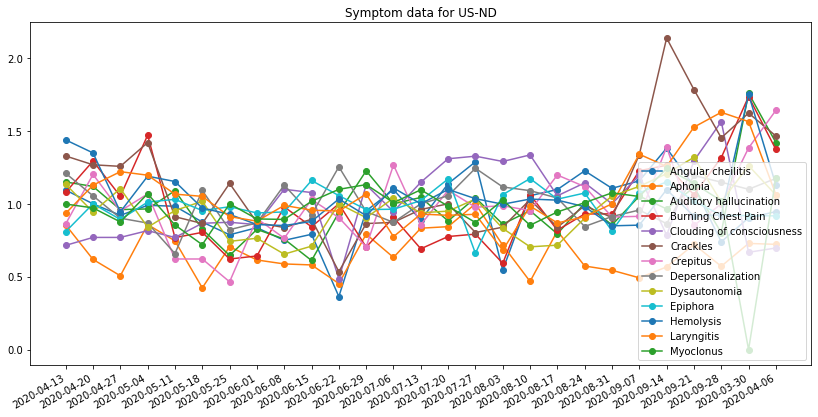

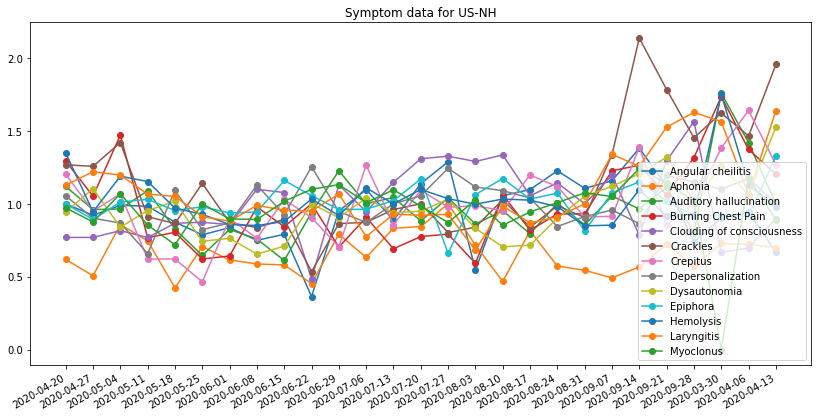

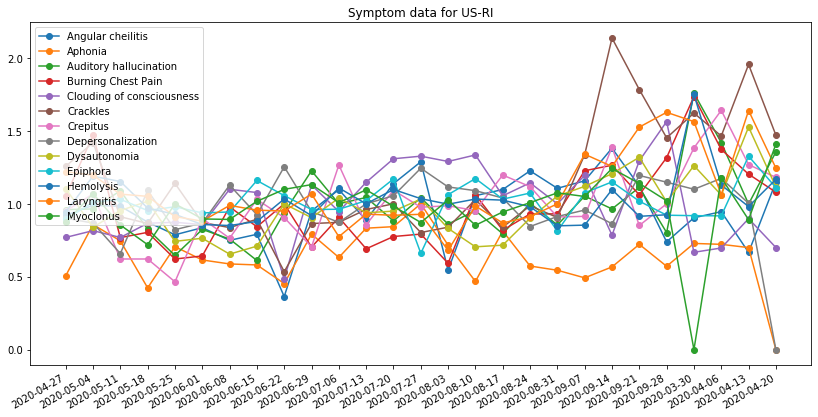

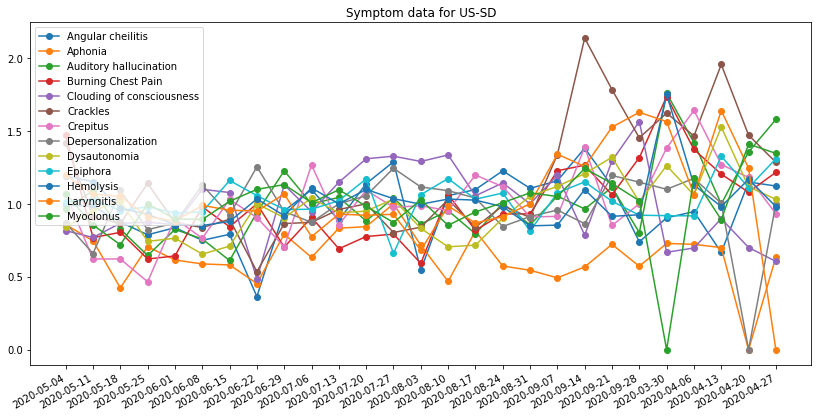

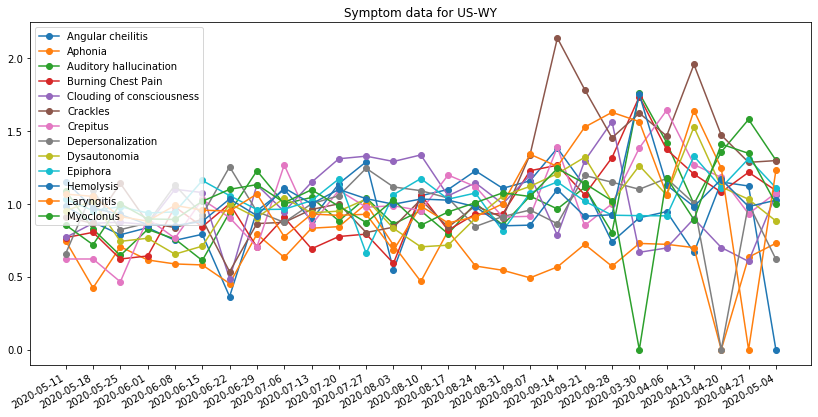

In [179]:
# EXTRA : symptoms search trends for each state
# Similar to generateSymptomsPlot() function below, except generates a plot of symptoms for each states,
# Takes a state starting index, increments the index by 27 in order to move onto the next states' data.
def generateStatePlot(startIndex):
    fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(14, 7))
    fig.autofmt_xdate()

    df = pd.read_csv('mergedDataset.csv')
    stateName = df.iloc[startIndex*27, 0]
    plt.title(f'Symptom data for {stateName}')

    symptomsList = list(df.columns.values)                  # For dynamically generating the legend
    symptomNames = []
    stateIndices = df.iloc[ startIndex:(startIndex+27), : ] # Get rows (r, r+27) for a given state
    rowcount = sum(1 for row in df)
    for symptomIdx in range(3,rowcount-3):
        symptomVals = stateIndices.iloc[:, symptomIdx]      # Get the the column for each symptom in CSV
        
        symptomName = symptomsList[symptomIdx][8:]          # Get the symptom and trim out the "symptom:" characters of the column header
        symptomNames.append(symptomName)                    # Add it to the legend of symptom names

        numberOfNans = countNans(symptomVals)               # Count the number of NaNs
        if numberOfNans > (len(symptomVals)/2) :            # If the majority of entries are blank, skip
            continue
        else:
            symptomVals[np.isnan(symptomVals)] = 0          # Set NaNs to 0 if there are any
            x_axis = stateIndices.iloc[:,1]                 # Set the x-axis to be the date column in CSV
            plt.plot_date(x_axis, symptomVals, linestyle='solid')  
    
    ax.legend(symptomNames)
    plt.show()

lastColumnIdx = floor(len(df.count(axis='columns')))/27
for idx in range(0,int(lastColumnIdx)):
    generateStatePlot(idx)

# Task 2.2: PCA to to reduce the above data to 2 dimensions (2 component PCA)

In [180]:
# We have 24 features x: # of symptoms searched
# Target y: hospitalizations
# We want to reduce this to a lower dimension for visualiztion (2D)
# Redefine dataframe
df = pd.read_csv('mergedDataset.csv')
df = df.fillna(0) # Convert NaNs to 0 in order to use PCA class
features = df.iloc[:, 2:26] # Seperate out the features


In [181]:
# Here we standardize our data as PCA is affected by scale,
# so use StandardScaler to standardize this onto a unit scale (mean=0, variance=1)
x = features.values
x = StandardScaler().fit_transform(x) # Standardize the features x

In [182]:
# Now we do PCA projection from 24D data to 2D data.
# Note, there isn't really any principle meaning assigned to each principle component after dimensionality reduction.
# The new components are just the 2 main dimensions of maxed variation.

pca = PCA(n_components=2) # 2 principal components instead of 1 to keep more fidelity in our data
principalComponents = pca.fit_transform(x) # Fit our 24D features into a 2D data (2 columns)

# Transform our 24D data into a 2D dataframe with targets y being hospitalizations from origional dataframe
principalDF = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1','principal component 2']
)
finalDF = pd.concat([principalDF, df[['hospitalizations']]], axis=1)
print(finalDF)


     principal component 1  principal component 2  hospitalizations
0                -1.920575               4.637539              86.0
1                -1.621247               4.169228              34.0
2                -0.939175               4.220050              16.0
3                -0.917965               3.839262              23.0
4                -0.330261               3.536542              24.0
..                     ...                    ...               ...
184               6.060499              -1.143356               4.0
185               5.891583              -1.838948               9.0
186               5.693171              -2.238709              15.0
187               5.737524              -2.019664              19.0
188               5.840109              -1.084637              20.0

[189 rows x 3 columns]


In [183]:
# Remove outliers for data visualization
# NOTE : There were 3 datasets with hospitalization values way above the national average:
    # For data visualization purposes, we removed them.
print(f'Number of rows with outliers: {len(finalDF)}')
finalDF = finalDF[(np.abs(stats.zscore(finalDF)) < 2.9).all(axis=1)]
print(f'Number of rows without outliers: {len(finalDF)}')

Number of rows with outliers: 189
Number of rows without outliers: 186


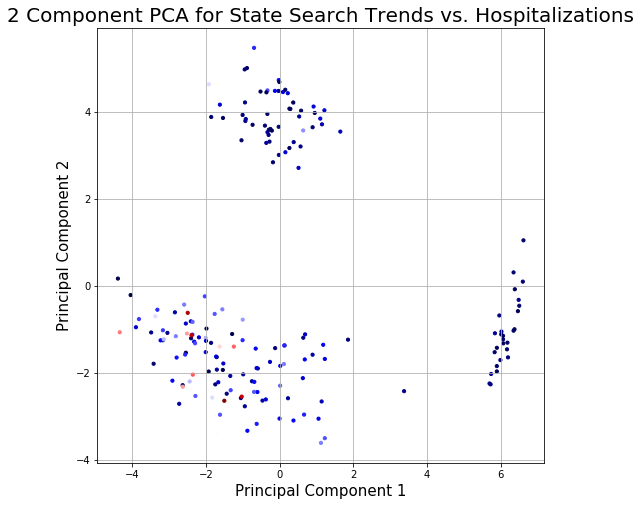

In [184]:
# Now we visualize the 2D projection.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA for State Search Trends vs. Hospitalizations', fontsize = 20)
colrMap = 'seismic'

ax.scatter(
    finalDF.loc[:,'principal component 1'],
    finalDF.loc[:,'principal component 2'],
    c = finalDF.loc[:,'hospitalizations'],
    cmap = colrMap,
    s = 10
)
ax.grid()

In the above chart, Dark blue is lowest hospitalizations, Red is highest hospitalizations. Faded colours are values in-between.

In [185]:
dimensionalVarianceRatios = pca.explained_variance_ratio_
print(dimensionalVarianceRatios)

[0.33563701 0.28215797]


As we reduce dimensionality, we lose information.
Explained variance tells us how much information (variance) can be attribute to each of the principal components.
Using the attribute "explained_variance_ratio" allows us to see the difference in variance.
33.56% of the information in (q1)
28.21% of the information in (q2)
Rest of the compoenents contain the rest of the information, so as we go down in dimension, we lose info.

So logically, we should include (q3) since it would increase how much information we have, but as we'll see, not much variance is encapsulated in increase D' to 3 from 2.

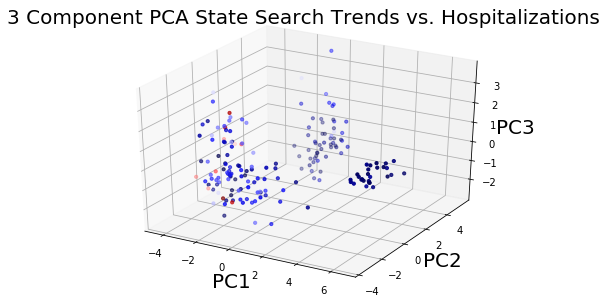

In [186]:
df = pd.read_csv('mergedDataset.csv')
df = df.fillna(0)
features = df.iloc[:, 2:26]
x = features.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1','principal component 2','principal component 3']
)
finalDF = pd.concat([principalDF, df[['hospitalizations']]], axis=1)
finalDF = finalDF[(np.abs(stats.zscore(finalDF)) < 3).all(axis=1)]
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('3 Component PCA State Search Trends vs. Hospitalizations', fontsize = 20)
colrMap = 'seismic'
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.scatter(
    finalDF.loc[:,'principal component 1'],finalDF.loc[:,'principal component 2'],finalDF.loc[:,'principal component 3'],
    c = finalDF.loc[:,'hospitalizations'],
    cmap = colrMap,
    s = 10
)
ax.grid()

In [187]:
dimensionalVarianceRatios = pca.explained_variance_ratio_
print(dimensionalVarianceRatios)

[0.33563701 0.28215797 0.06686054]


Q3 only encapsulates 6% of the variance from the origional dataset, meaning a lot of the variance is encapsulated in the remaining components.

# Task 2.3: Cluster methods.

Here, we use K-medoids to to evaluate possible groups in the trend dataset.
First, let's look at the PCA data, since we've just familiarized ourself with it.
Below is our implementation of a KMeans class which implements K-medoids clustering.

In [188]:
# Define a global function to calculate the Euclidean distance between 2 vectors
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps                                    # Set to True for debugging
        self.clusters = [[] for _ in range(self.K)]                     # list of sample indices for each cluster
        self.centroids = []                                             # the centers (mean feature vector) for each cluster


    # Helper function each sample will get the label of the cluster it was assigned to
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.nrSamples)                               # We don't actually know the labels of our data, just the index it was assigned to
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    # Helper function to create clusters arounds centroids: Assign clusters to the closest centroids
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    # Helper function which gets the closest centroid for a given sample and list of centroids
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    # Helper fucntion to assign mean value of clusters to centroids
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))             # Centroids initially 0 of dimension k by n
        for cluster_idx, cluster in enumerate(clusters):            # iterate over all clusters, then calculate the mean
            cluster_mean = np.mean(self.X[cluster], axis=0)         # X[cluster_idx] only returns the samples that are in the current cluster we're iterating on
            centroids[cluster_idx] = cluster_mean
        return centroids

    # Helper function to compute distances between previous and current centroids, and sees if they're 0 --> converged
    def _is_converged(self, centroids_old, centroids):              # Gets called max_iters times in fit
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0


    def predict(self, X):
        self.X = X
        self.nrSamples, self.n_features = X.shape
        
        # initialize centroids
        randomIdxs = np.random.choice(self.nrSamples, self.K, replace=False)    # List of lists --> List of sample indices for each cluster
        self.centroids = [self.X[idx] for idx in randomIdxs]                    # Mean feature vector for each cluster

        # Optimize clusters
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)       # Assign samples to closest centroids (create clusters)
            centroids_old = self.centroids                              # Calculate new centroids from the clusters
            self.centroids = self._get_centroids(self.clusters)   
            if self._is_converged(centroids_old, self.centroids):       # Check if clusters have changed
                break
            if self.plot_steps:                                         # For debugging
                self.plot()

        # Classify samples by their responsability
        return self._get_cluster_labels(self.clusters)

    # Here, we plot the data
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('K-Means clustering on PCA Reduced Search Trends vs. Hospitalizations', fontsize = 20)
        plt.show()

In [192]:
# Apply PCA reduction on the DataFrame and convert the samples and results to numpy arrays to use for KMeans
df = pd.read_csv('mergedDataset.csv')
df = df.fillna(0) 
features = df.iloc[:, 2:26]
x = features.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1','principal component 2']
)
finalDF = pd.concat([principalDF, df[['hospitalizations']]], axis=1)
X = principalDF.to_numpy()
y = finalDF.iloc[:,-1].to_numpy()

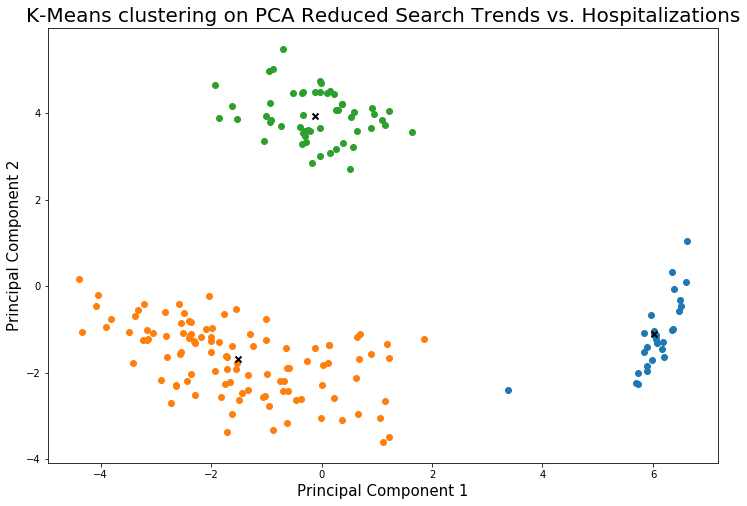

In [193]:
k3 = KMeans(K=3, max_iters=150, plot_steps=False)
y_pred = k3.predict(X)
k3.plot()

In [195]:
df = pd.read_csv('mergedDataset.csv')
df = df.fillna(0) 
features = df.iloc[:, 2:26]
datesStates = df.iloc[:,0:2]
x = features.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1','principal component 2']
)
finalDF = pd.concat([principalDF, df[['hospitalizations']]], axis=1)
finalDF = pd.concat([datesStates, finalDF], axis=1)

entries = finalDF.values.tolist()

cluster1,cluster2,cluster3 = [],[],[]

#e[2] is PC1, e[3] is pc2 
for e in entries:
    
    if e[2]<2 and e[3]<2:
        cluster1.append(e) # Cluster 1 : Bottom left
    if e[2]>2 and e[3]<2:
        cluster2.append(e) # Cluster 2 : Bottom right
    if e[3]>2:
        cluster3.append(e) # Cluster 3 : TOP
    

def countStateFrequencies(lst):
    freq = {}
    states = []
    for l in lst:
        states.append(l[0])
    for s in states:
        if (s in freq):
            freq[s] += 1
        else:
            freq[s] = 1
    print("States and their frequency of appearance in cluster : ")
    for k,v in freq.items():
        print(f'\t{k} : {v}')

def hospitalizationData(lst):
    hosp = []
    for h in lst:
        hosp.append(h[4])
    total = sum(hosp)
    avg = total/len(hosp)
    min_ = min(hosp)
    max_ = max(hosp)
    print("Hospitalization data for this cluster : ")
    print(f'\tTotal : {total}\n\tAverage : {avg}\n\tMin : {min_}\n\tMax : {max_}')

print('====== Data extrapolated from "Bottom left" cluster ======')
countStateFrequencies(cluster1)
hospitalizationData(cluster1)
print('\n')

print('====== Data extrapolated from "Bottom Right" cluster ======')
countStateFrequencies(cluster2)
hospitalizationData(cluster2)
print('\n')


print('====== Data extrapolated from "Top" cluster ======')
countStateFrequencies(cluster3)
hospitalizationData(cluster3)
print('\n')


====== Data extrapolated from "Bottom left" cluster ======
States and their frequency of appearance in cluster : 
	US-MT : 27
	US-ND : 26
	US-RI : 27
	US-SD : 27
Hospitalization data for this cluster : 
	Total : 6095.0
	Average : 56.96261682242991
	Min : 0.0
	Max : 605.0


====== Data extrapolated from "Bottom Right" cluster ======
States and their frequency of appearance in cluster : 
	US-ND : 1
	US-WY : 27
Hospitalization data for this cluster : 
	Total : 283.0
	Average : 10.107142857142858
	Min : 3.0
	Max : 20.0


====== Data extrapolated from "Top" cluster ======
States and their frequency of appearance in cluster : 
	US-ME : 27
	US-NH : 27
Hospitalization data for this cluster : 
	Total : 1164.0
	Average : 21.555555555555557
	Min : 3.0
	Max : 86.0


